In [6]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#removed a band from 4 bands

original_raster_path = 'data.TIF'
# Path for the new raster without the 2nd band
new_raster_path = 'removed_2nd_band.TIF'

# Open the original raster in read-only mode
src_ds = gdal.Open(original_raster_path, gdal.GA_ReadOnly)
if src_ds is None:
    print("Unable to open the original raster file.")
    exit()

# Get the raster properties
x_pixels = src_ds.RasterXSize
y_pixels = src_ds.RasterYSize
driver = src_ds.GetDriver()
data_type = src_ds.GetRasterBand(1).DataType
geotransform = src_ds.GetGeoTransform()
projection = src_ds.GetProjection()

# Create a new raster dataset with one less band than the original
new_band_count = src_ds.RasterCount - 1
dst_ds = driver.Create(new_raster_path, x_pixels, y_pixels, new_band_count, data_type)
if dst_ds is None:
    print("Unable to create the new raster file.")
    exit()

# Set georeferencing info
dst_ds.SetGeoTransform(geotransform)
dst_ds.SetProjection(projection)

# Copy the bands from the original raster to the new raster, skipping the 2nd band
band_num_to_skip = 2
band_to_remove = src_ds.GetRasterBand(band_num_to_skip)
removed_band_data = band_to_remove.ReadAsArray()

for src_band_num in range(1, src_ds.RasterCount + 1):
    if src_band_num == band_num_to_skip:
        continue  # Skip the 2nd band
    src_band = src_ds.GetRasterBand(src_band_num)

    # Adjust the band number for the destination raster
    dst_band_num = src_band_num if src_band_num < band_num_to_skip else src_band_num - 1
    dst_band = dst_ds.GetRasterBand(dst_band_num)

    # Read the data from the source band and write it to the destination band
    band_data = src_band.ReadAsArray()
    dst_band.WriteArray(band_data)

# Close the datasets
src_ds = None
dst_ds = None

print("The new raster without the 2nd band has been created.")

The new raster without the 2nd band has been created.


In [2]:
fn = "data/3/data.TIF"

In [3]:
ds = gdal.Open(fn)

In [4]:
print("'ds' type", type(ds))

'ds' type <class 'osgeo.gdal.Dataset'>


In [5]:
print("Projection: ", ds.GetProjection())  # get projection
print("Columns:", ds.RasterXSize)  # number of columns
print("Rows:", ds.RasterYSize)  # number of rows
print("Band count:", ds.RasterCount)  # number of bands

Projection:  PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]
Columns: 16384
Rows: 12344
Band count: 4


In [6]:
print("GeoTransform", ds.GetGeoTransform())

GeoTransform (246717.33307071, 0.3, 0.0, 1989720.3061312002, 0.0, -0.3)


In [7]:
data_array = []

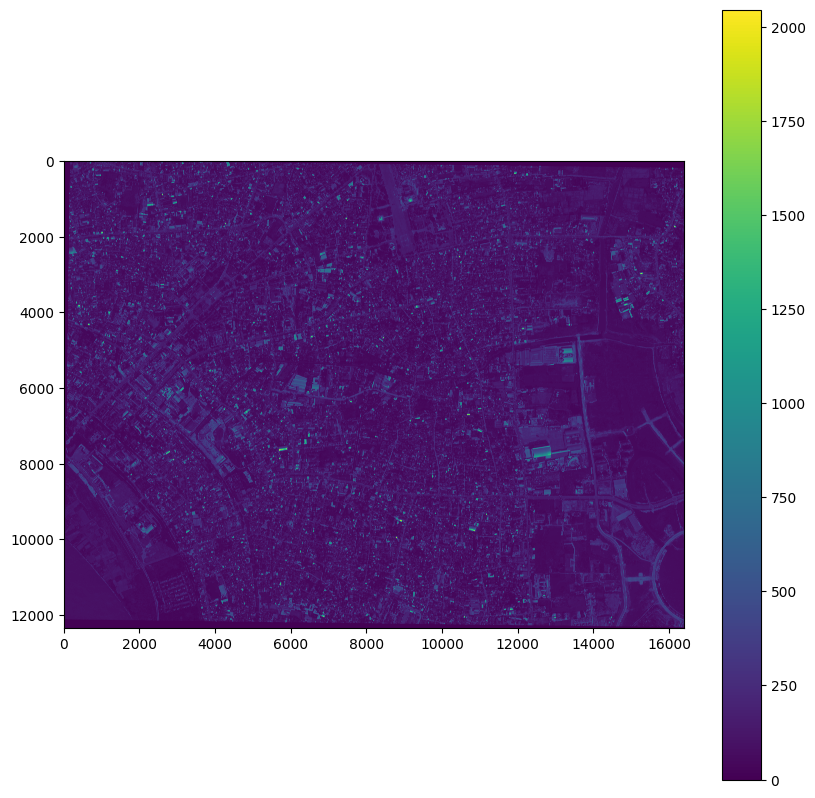

In [8]:
data_array.append(ds.GetRasterBand(1).ReadAsArray())
data_array[0].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[0])
plt.colorbar()

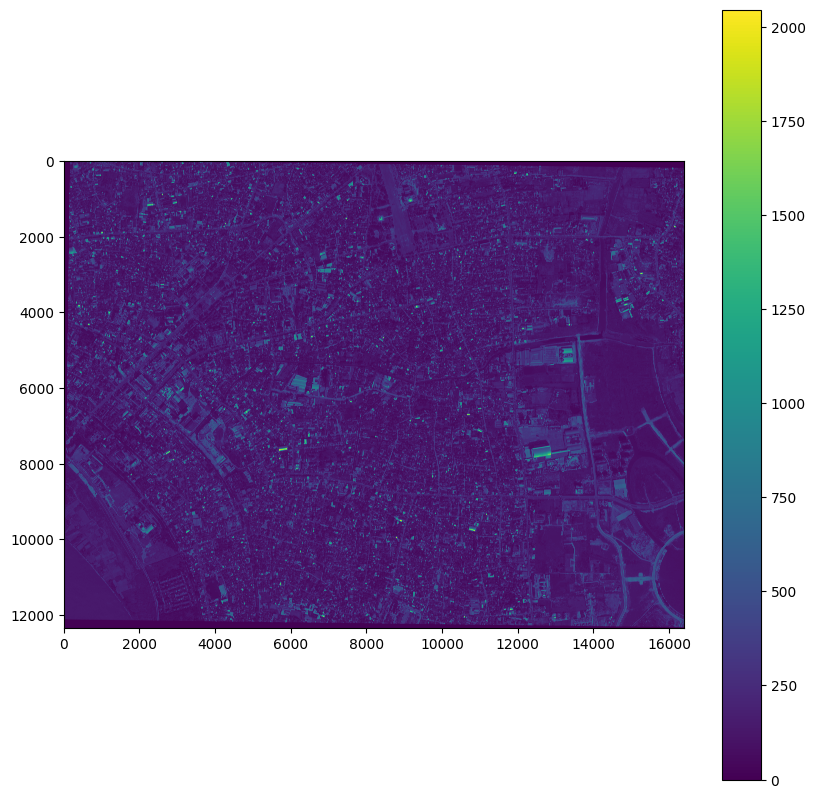

In [9]:
data_array.append(ds.GetRasterBand(2).ReadAsArray())
data_array[1].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[1])
plt.colorbar()

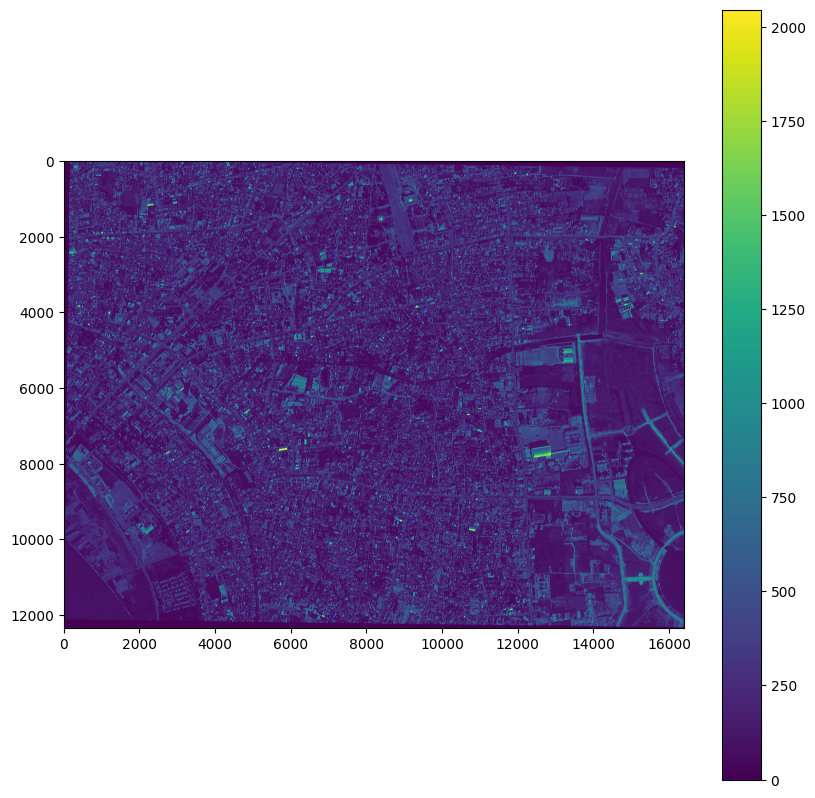

In [10]:
data_array.append(ds.GetRasterBand(3).ReadAsArray())
data_array[2].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[2])
plt.colorbar()

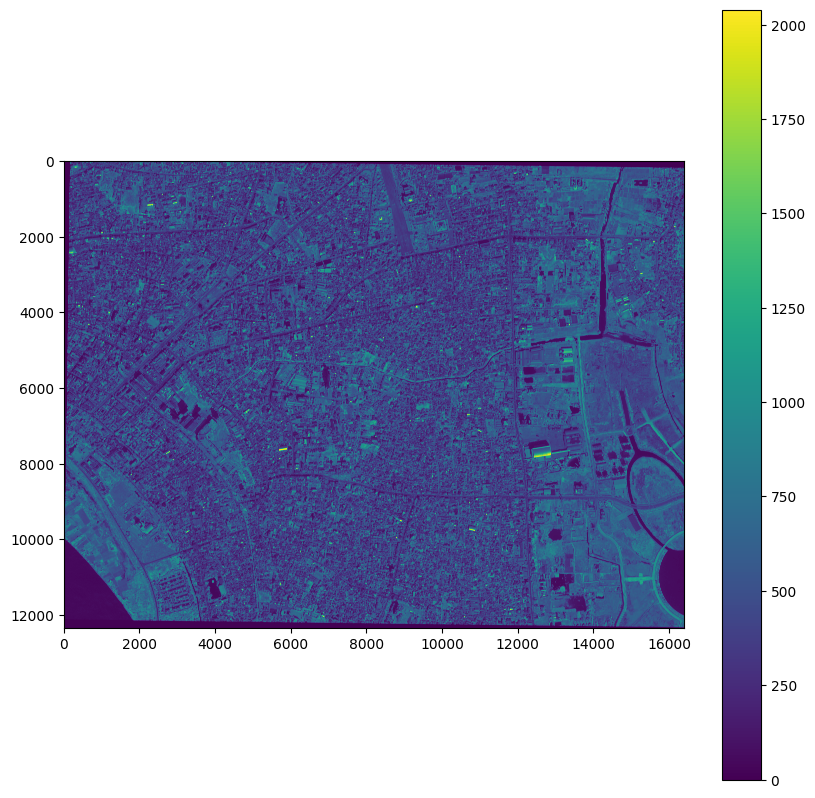

In [11]:
data_array.append(ds.GetRasterBand(4).ReadAsArray())
data_array[3].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[3])
plt.colorbar()

In [20]:
# SUBSTRACT
one = np.array(data_array[0])
two = np.array(data_array[1])
# diff = np.subtract(one, two)
# print(diff)

print(np.array_equal(one,two))

for i in range(100):
    print(two[250,1200+i]-one[250,1200+i])

False
47
48
50
50
51
49
49
47
44
43
43
41
40
42
43
39
40
46
49
43
47
54
52
51
51
52
51
53
52
53
53
53
52
50
48
44
33
19
17
18
16
15
14
14
13
14
15
15
17
16
16
16
15
14
14
13
15
15
14
14
15
18
26
29
25
25
22
27
33
32
32
34
35
39
36
30
31
32
32
34
34
31
21
15
14
13
13
13
13
12
13
16
19
25
32
39
38
56
99
98


In [13]:
# SUBSTRACT
one = np.array(data_array[1])
two = np.array(data_array[2])
diff = np.subtract(one, two)
print(diff)

print(len(np.unique(diff)))
# print(np.array_equal(one,two))

# for i in range(100):
#     print(two[250,1200+i]-one[250,1200+i])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2102


In [16]:
# SUBSTRACT
one = np.array(data_array[2])
two = np.array(data_array[3])
diff = np.subtract(one, two)
print(diff)

print(len(np.unique(diff)))

unique = np.unique(diff)

print(unique)
# print(np.array_equal(one,two))

# for i in range(100):
#     print(two[250,1200+i]-one[250,1200+i])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2127
[    0     1     2 ... 65533 65534 65535]


In [18]:
# SUBSTRACT
one = np.array(data_array[0])
two = np.array(data_array[3])
diff = np.subtract(one, two)
print(diff)

print(len(np.unique(diff)))

unique = np.unique(diff)

print(unique)
# print(np.array_equal(one,two))

# for i in range(100):
#     print(two[250,1200+i]-one[250,1200+i])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2906
[    0     1     2 ... 65533 65534 65535]


In [19]:
# SUBSTRACT
one = np.array(data_array[1])
two = np.array(data_array[3])
diff = np.subtract(one, two)

print(len(np.unique(diff)))

unique = np.unique(diff)

print(unique)
# print(np.array_equal(one,two))

# for i in range(100):
#     print(two[250,1200+i]-one[250,1200+i])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2584
[    0     1     2 ... 65533 65534 65535]


EXTRACT ONLY FIRST BAND FROM ORIGINAL .TIF
STORE EACH BAND ARRAY DIFF FROM FIRST BAND TO N BAND AS GROUPPED KEY MAP VALUE AND PLUS IT WITH THE DIFF VALUE FROM THE FIRST BAND
[THE KEY IS THE DIFF VALUE, THE VALUE IS THE ARRAY OF COORDINATE POSITION]
CONSTRUCT IT BACK USING WriteAsArray
Save it back to .TIF

IDEA :
Columns: 16384
Rows: 12344

Store the diff data in last row and in the last pixel add information about how many rows used for this diff
example : last row, last column -> get the value = 2

so subtract the rows by 2 and get the value from those 2 rows.

so we only use the last 2 row as the diff data to construct it back for next n band

In [17]:
ndv = data_array = ds.GetRasterBand(1).GetNoDataValue()
print('No data value:', ndv)

No data value: None


In [18]:
ds = None

In [19]:
driver_gtiff = gdal.GetDriverByName('GTiff')
print(type(driver_gtiff))

<class 'osgeo.gdal.Driver'>


In [21]:
# reopen the dataset because we closed it above
ds = gdal.Open(fn)
fn_copy = "data/3/data_copy.TIF"
ds_copy = driver_gtiff.CreateCopy(fn_copy, ds)

In [29]:
data_array[0] = ds.GetRasterBand(1).ReadAsArray()  # read band data from the existing raster
data_nan = np.where(data_array[0] == ndv, np.nan, data_array[0])  # set all the no data values to np.nan so we can easily calculate the minimum elevation
data_min = np.min(data_nan)  # get the minimum elevation value (excluding nan)
data_stretch = np.where(data_array[0] == ndv, ndv, (data_array[0] - data_min) * 1.5)  # now apply the strech algorithm
ds_copy.GetRasterBand(1).WriteArray(data_stretch)  # write the calculated values to the raster
ds_copy = None  # properly close the raster

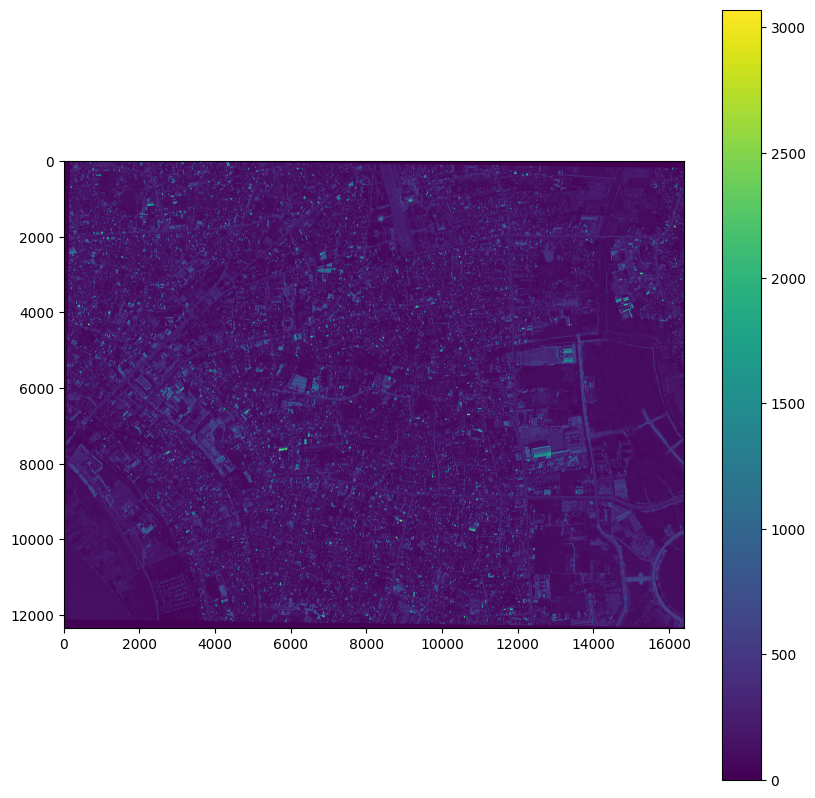

In [30]:
ds_copy = gdal.Open(fn_copy)
data_stretch = ds_copy.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(10, 10))
plt.imshow(data_stretch)
plt.colorbar()